<a href="https://colab.research.google.com/github/HasanChamok/YOLO_V8/blob/main/DetectCatandDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Fri Oct  6 10:16:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
Home = os.getcwd()
Home

'/content'

In [3]:
!pip install ultralytics

In [4]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 394, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://d

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="D0epbYV4P8nKJ7RtZD04")
project = rf.workspace("talentpro").project("cats-and-dogs-fetbf")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.194, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to cats-and-dogs-1 in yolov8:: 100%|██████████| 334/334 [00:00<00:00, 4453.98it/s]


In [9]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=30 imgsz=640

Ultralytics YOLOv8.0.194 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/cats-and-dogs-1/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fals

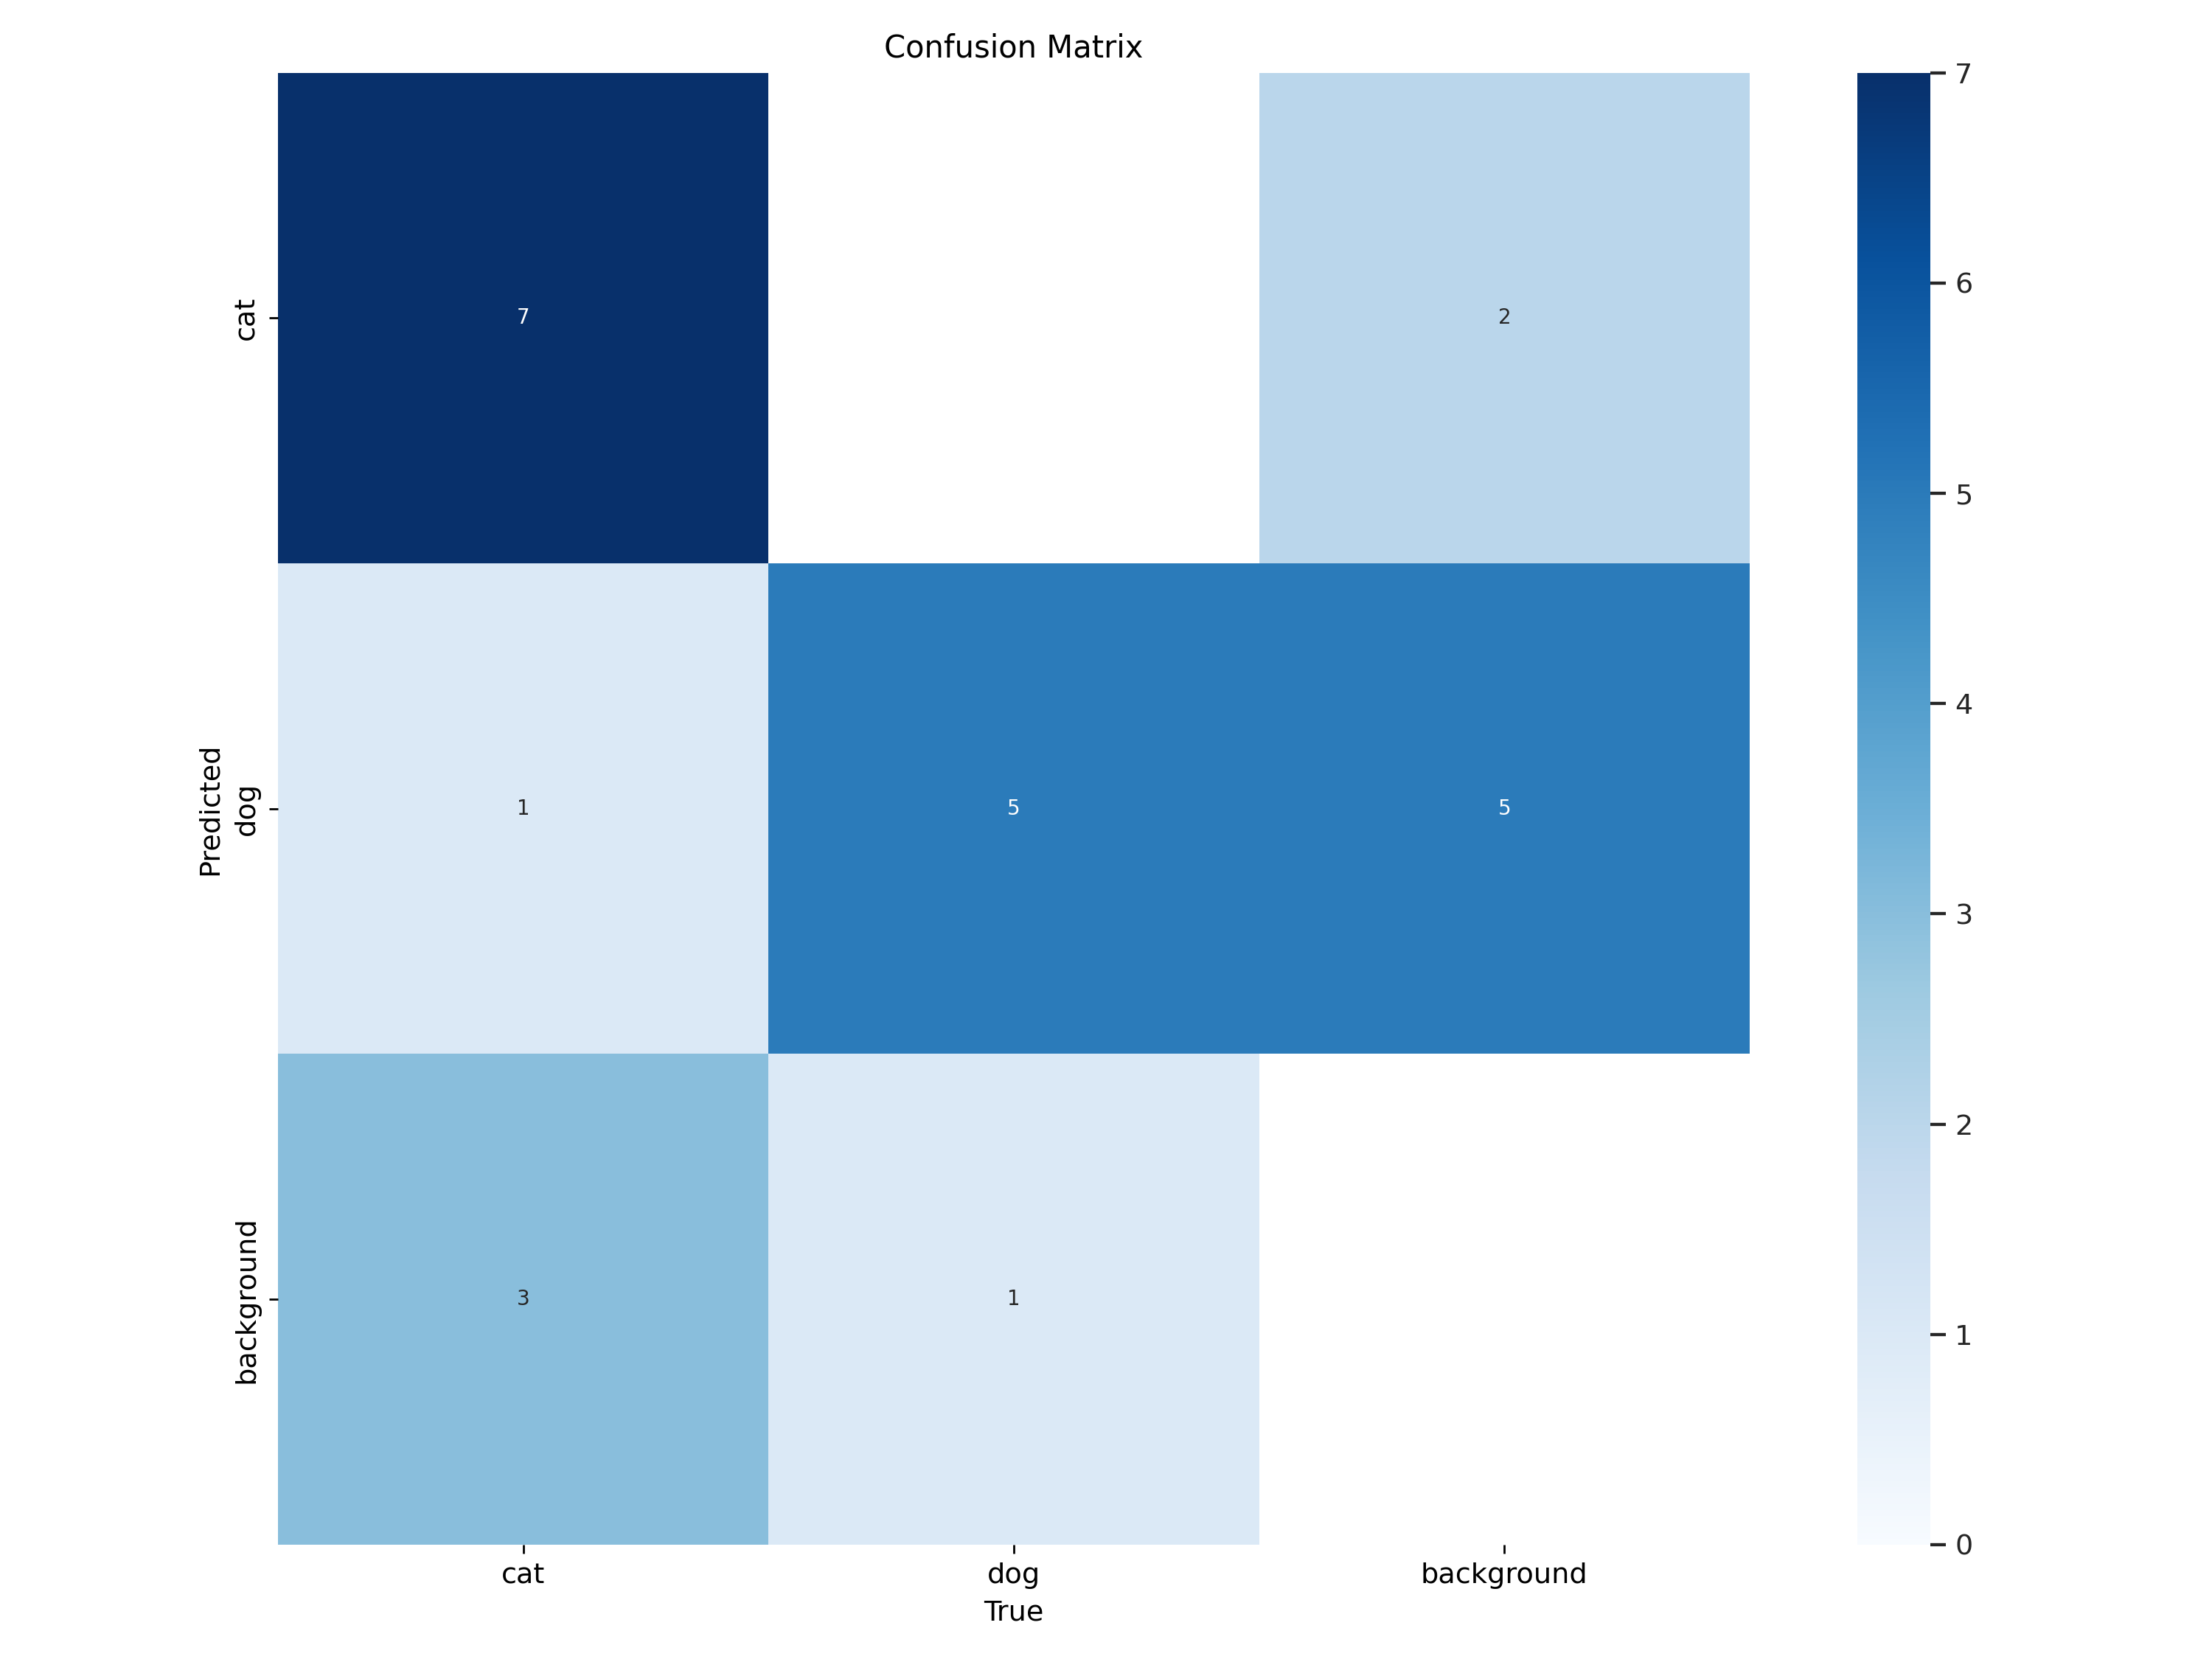

In [12]:
Image(filename=f'/content/runs/detect/train4/confusion_matrix.png',width=600)

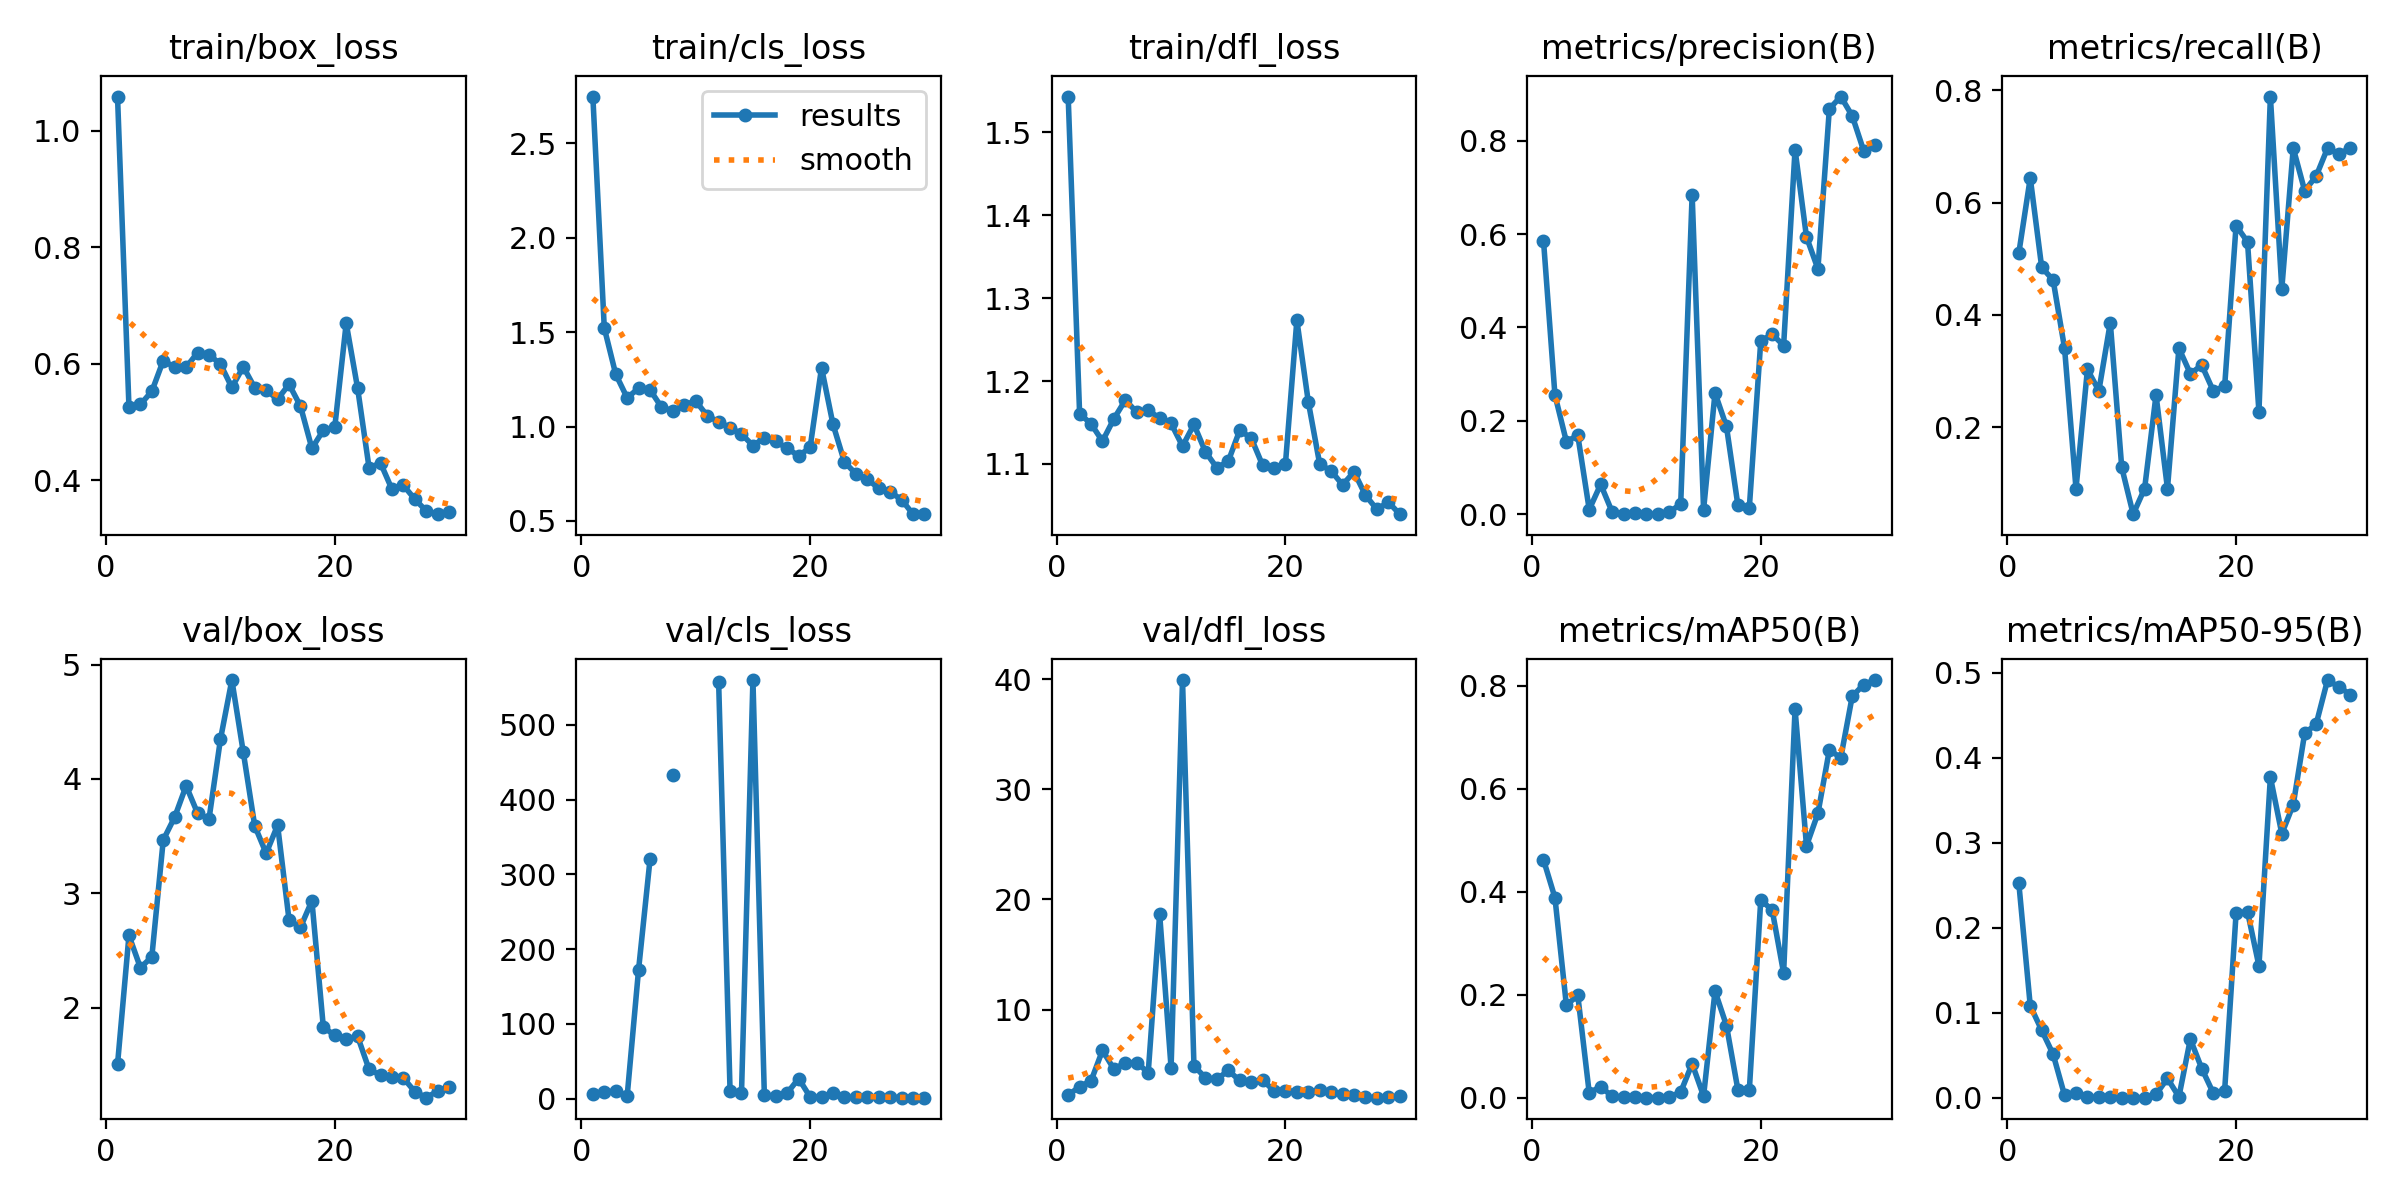

In [13]:
Image(filename=f'/content/runs/detect/train4/results.png',width=600)

In [14]:
!yolo task=detect mode=val model=/content/runs/detect/train4/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.194 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/cats-and-dogs-1/valid/labels.cache... 13 images, 0 backgrounds, 0 corrupt: 100% 13/13 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.65it/s]
                   all         13         17      0.854      0.697      0.779      0.494
                   cat         13         11      0.992      0.727      0.824      0.593
                   dog         13          6      0.715      0.667      0.735      0.396
Speed: 0.2ms preprocess, 26.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [15]:
!yolo task=detect mode=predict model=/content/runs/detect/train4/weights/best.pt conf=0.5 source={dataset.location}/test/images

Ultralytics YOLOv8.0.194 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs

image 1/7 /content/cats-and-dogs-1/test/images/cat16_jpg.rf.2391b0919a4c2c228bf412a66e1f65ba.jpg: 640x640 1 cat, 37.0ms
image 2/7 /content/cats-and-dogs-1/test/images/cat17_jpg.rf.1f317fbc6676a601a87252461c0bb37f.jpg: 640x640 2 cats, 33.6ms
image 3/7 /content/cats-and-dogs-1/test/images/cat30_jpeg.rf.ed479d35568d1ad2334e9282da0597b8.jpg: 640x640 1 cat, 33.3ms
image 4/7 /content/cats-and-dogs-1/test/images/cat35_jpg.rf.3486acc1422f387e940d7d9c252aa552.jpg: 640x640 1 cat, 33.3ms
image 5/7 /content/cats-and-dogs-1/test/images/tahoe-mr58GkEDKMI-unsplash_jpg.rf.189e28095eff0ccb36170de33205761b.jpg: 640x640 1 dog, 27.3ms
image 6/7 /content/cats-and-dogs-1/test/images/tanner-crockett-9WMoaz8kDrU-unsplash_jpg.rf.3c90ebee2ce6e15171ade72ab8ae51d2.jpg: 640x640 1 dog, 27.3ms
image 7/7 /content/cats-and-dogs-1/test/images/yan-lauri

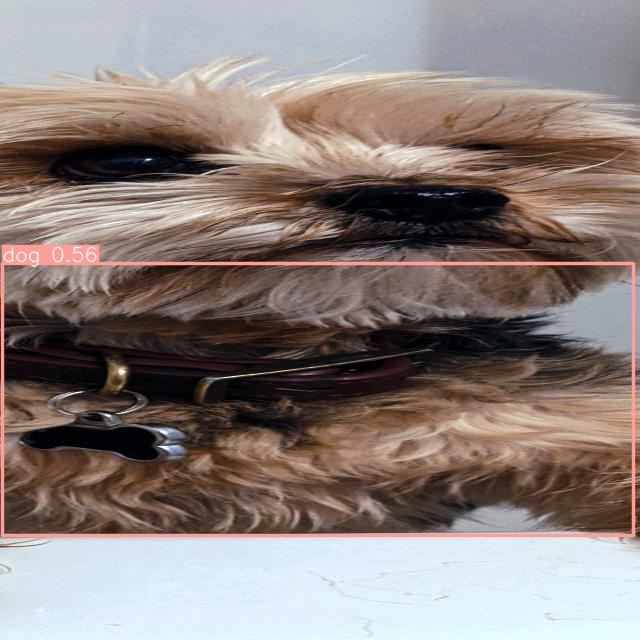

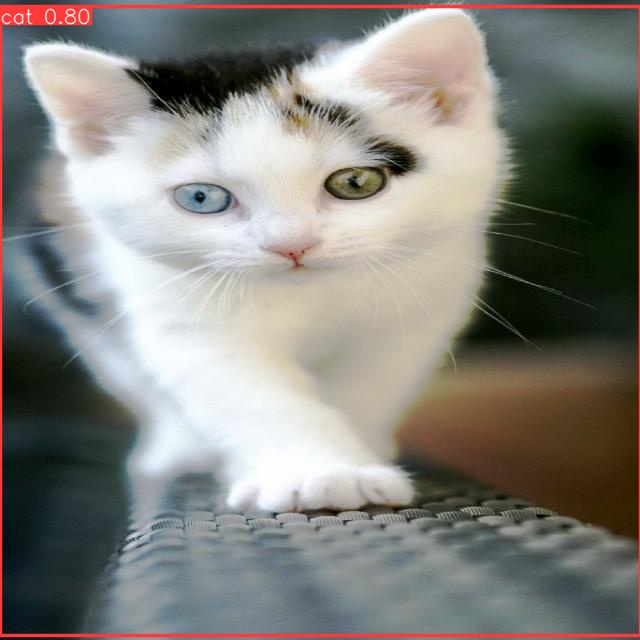

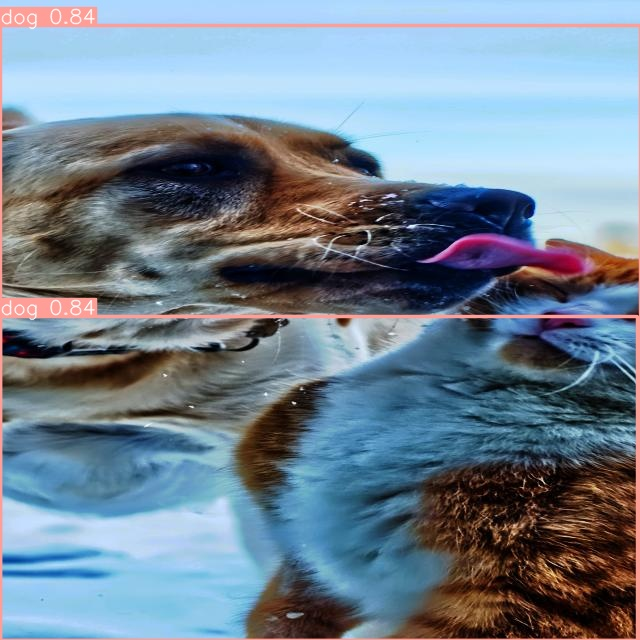

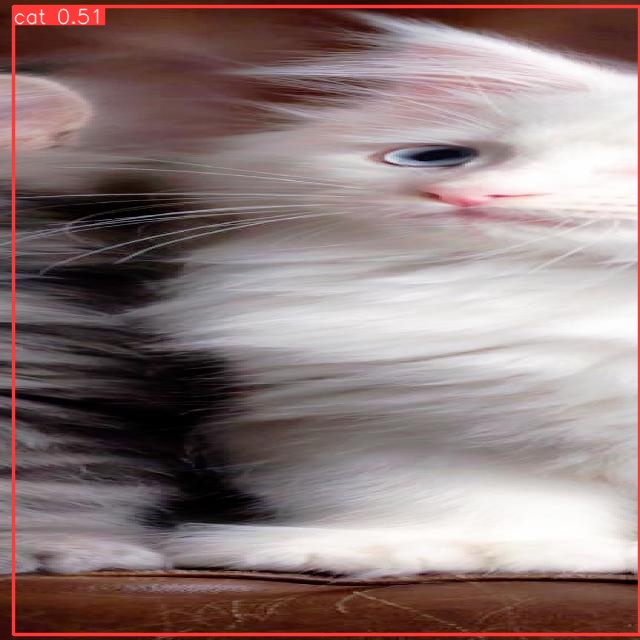

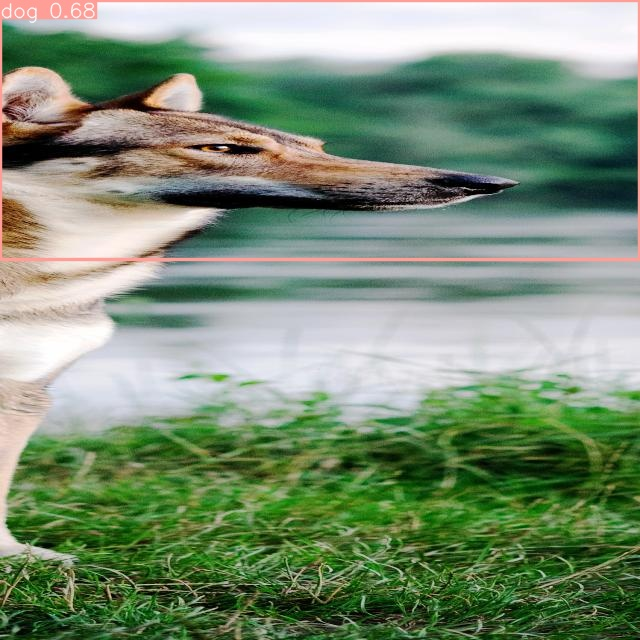

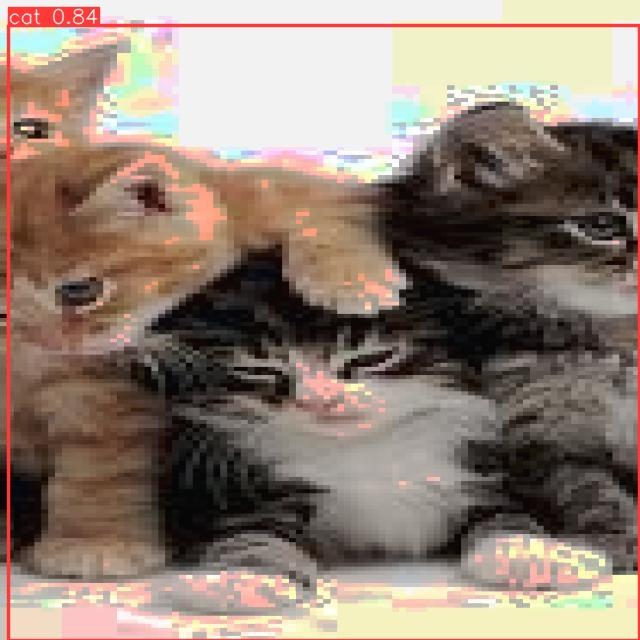

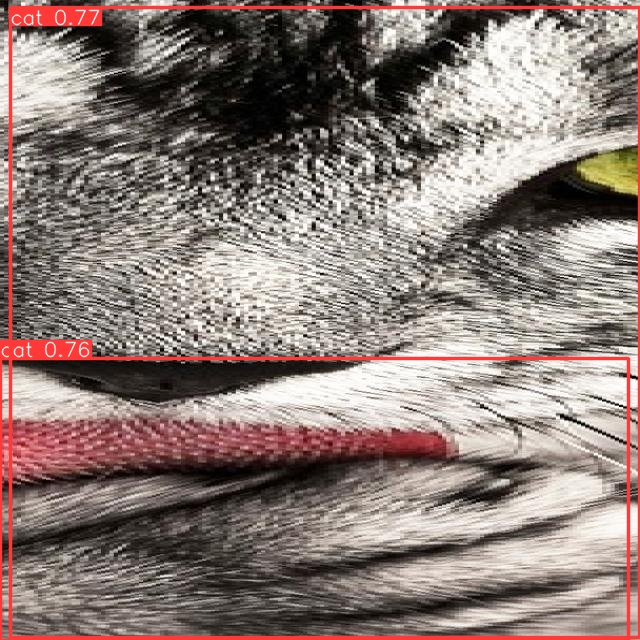

In [17]:
import glob
from IPython.display import display, Image

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
  display(Image(filename=image_path,height=400,width=500))
  print("\n")